In [7]:
# Make sure we have the packages we need
import numpy as np
import scipy as sc
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'spring'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('spring')

In [8]:
def random_nbr(N,node):
    """
    Given a node in NxN grid, returns a neighbor uniformly at random
    Parameters
    ----------
    N: (int) Size of grid (NxN)
    node: (tuple) node (x,y) 
    Returns
    ----------
    next: (tuple) Uniform random neigbor (x,y) of node 
    """
    N_grid = np.arange(1,N+1)
    dirs = np.concatenate((np.eye(2),0-np.eye(2)),axis=0)  
    nbrs = [tuple(map(sum,zip(node,dirs[i]))) for i in range(len(dirs))]
    node_nbrs = []
    for new_node in nbrs:
        if (new_node[0] in N_grid) and (new_node[1] in N_grid):
            node_nbrs.append(new_node)
    return node_nbrs[np.random.choice(len(node_nbrs))]


def add_path(N,nodes_visited):
    """
    Adds a path to a tree via Wilson's algorithm
    
    Parameters
    ----------
    N: Size of grid (NxN)
    nodes_visited: list of nodes already added to tree
        
    Returns
    ----------
    
    """
    # Find smallest node not yet visited
    i = 0
    found = 0
    while not found:
      if (i%N+1,int(i/N)+1) not in nodes_visited:
          start = (i%N+1,int(i/N)+1)
          found = 1
      i = i+1    

    walk_collection = []
    path = [start]
    current_walk_start = start
    
    while path[-1] not in nodes_visited:
      next_node = random_nbr(N,path[-1])
      path.append(next_node)
      if next_node in path[:-1]:
        walk_collection.append([current_walk_start,path])
        ind = path.index(next_node)
        path = path[:ind+1]
        current_walk_start = path[-1]
      
    walk_collection.append([current_walk_start,path])
    return walk_collection,path


def draw_forest(N,tree,fig,shading=1):
  plt.xlim(0,N+1)
  plt.ylim=(0,N+1)
  plt.title('Wilson\'s algorithm: %ix%i grd' % (N,N))

  n = np.arange(1,N+1)
  plt.plot(np.repeat(n,N),np.tile(n,N), ',w')

  count = 1.0
  for path in tree:
    last_node = path[0]
    plt.plot(last_node[0],last_node[1],'.g')
    for i in np.arange(1,len(path)):
      next_node = path[i]
      plt.plot(next_node[0],next_node[1],'.g')
      if shading:
        plt.plot([last_node[0],next_node[0]],[last_node[1],next_node[1]], c=cmap(count/len(tree)))
      else:
        plt.plot([last_node[0],next_node[0]],[last_node[1],next_node[1]], c=cmap(0))  
      last_node = next_node
    count+=1.0   

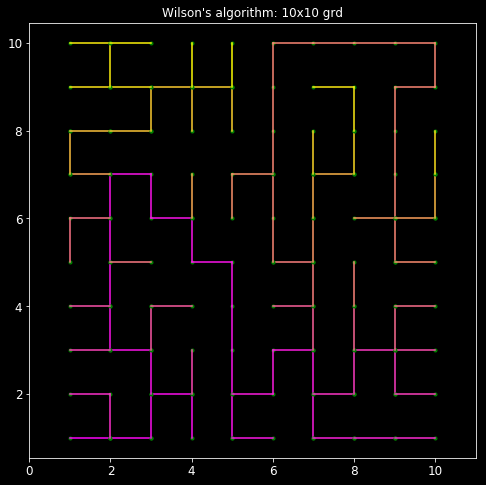

In [9]:
N = 10
start_node = (1,1)
np.random.seed(2)              

tree = []
paths_collection = []
nodes_visited = [start_node]

fig = plt.figure(figsize=(8,8))
draw_forest(N,tree,fig)

while len(nodes_visited) < N*N:
  walks,path = add_path(N,nodes_visited)
  paths_collection = paths_collection + walks
  tree.append(path)
  for i in range(len(path)-1):
    nodes_visited.append(path[i])

draw_forest(N,tree,fig)
plt.show()

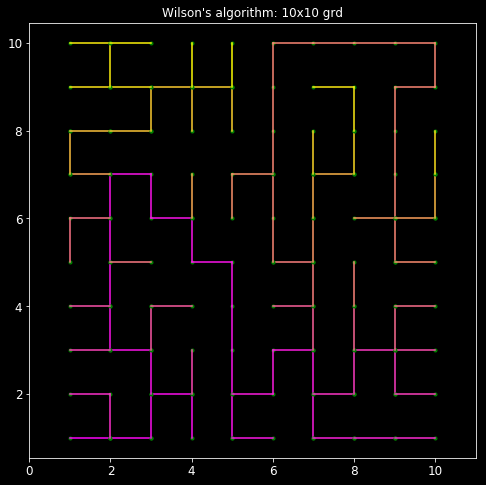

In [10]:
N = 10
start_node = (1,1)
np.random.seed(2)              

tree = []
paths_collection = []
nodes_visited = [start_node]

fig = plt.figure(figsize=(8,8))
draw_forest(N,tree,fig)

while len(nodes_visited) < N*N:
  walks,path = add_path(N,nodes_visited)
  paths_collection = paths_collection + walks
  tree.append(path)
  for i in range(len(path)-1):
    nodes_visited.append(path[i])

draw_forest(N,tree,fig)
plt.show()

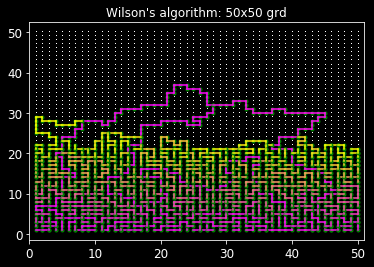

In [ ]:
from IPython import display
import time

N = 50
start_node = (1,1)
np.random.seed(2)              

tree = []
paths_collection = []
nodes_visited = [start_node]

fig = plt.subplots(figsize=(10,10))
draw_forest(N,tree,fig)
plt.show()
time.sleep(0)

while len(nodes_visited) < N*N:
  display.clear_output(wait=True)
  walks,path = add_path(N,nodes_visited)
  paths_collection = paths_collection + walks
  tree.append(path)
  for i in range(len(path)-1):
    nodes_visited.append(path[i])
  draw_forest(N,tree,fig,shading=1)
  plt.show()
  time.sleep(0)

In [ ]:
%%capture
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(0,N+1), ylim=(0,N+1))
ax.set_title('Wilson\'s algorithm: %ix%i grd' % (N,N))
ax.plot(np.repeat(n,N),np.tile(n,N), ',w')


def draw_forest_ax(N,tree,ax,shading=1):

  n = np.arange(1,N+1)

  count = 1.0
  for path in tree:
    last_node = path[0]
    fig.plot(last_node[0],last_node[1],'.g')
    for i in np.arange(1,len(path)):
      next_node = path[i]
      plt.plot(next_node[0],next_node[1],'.g')
      cmap1=plt.get_cmap('spring')
      if shading:
        plt.plot([last_node[0],next_node[0]],[last_node[1],next_node[1]], c=cmap1(count/len(tree)))
      else:
        plt.plot([last_node[0],next_node[0]],[last_node[1],next_node[1]], c=cmap1(0))  
      last_node = next_node
    count+=1.0   



def animate(i):
    line = ax.plot((data[i][0][0],data[i][1][0]),(data[i][0][1],data[i][1][1]),c=cmap(data[i][2]+4),lw=2)  
    disp_text.set_text(disp_template % (i+1,crossed[i]))
    return line, disp_text

# First way to display animation. Need to use 'jshtml' for Google Colab, 'html5' for localhost
plt.rc('animation', html='jshtml')
ani = FuncAnimation(fig, animate, N, interval=200, blit=True)




while len(nodes_visited) < N*N:
  walks,path = add_path(N,nodes_visited)
  paths_collection.append(walks)
  tree.append(path)
  for i in range(len(path)-1):
    nodes_visited.append(path[i])

draw_forest(N,tree,ax)

In [253]:
for i in range(5):
  print(paths_collection[i])

[(2, 1), [(2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (5, 4), (4, 4)]]
[(4, 4), [(2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (5, 3), (4, 3)]]
[(4, 3), [(2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 4)]]
[(4, 4), [(2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (5, 3), (4, 3)]]
[(4, 3), [(2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 3)]]
